In [8]:
import requests
import json
import numpy as np
import pandas as pd
import getpass
from shapely.geometry import Point, Polygon
import geopandas as gpd
from geopandas import GeoDataFrame

In [11]:
root = "https://api.claro-br.kidodynamics.com/v1/"

In [2]:
cell_ids = [18505, 47652, 56833, 68676, 86100, 148628, 200132, 240236]

In [15]:
cell_ids = [3955, 18505, 39669, 47652, 56833, 57045, 68676, 84777, 86100, 87207, 99503, 127553, 148628, 158030, 200132, 
201703, 211037, 217324, 217541, 226891, 240236] 

# Login

In [9]:
user = input('Enter username:')
password = getpass.getpass('Pass')

Enter username:gabrieljunqueirasouza@hotmail.com
Pass········


In [12]:
login_response = requests.post(
    root + 'users/login',
    headers={
        'accept': 'application/json',
        'Content-Type': 'application/x-www-form-urlencoded',
    },
    data=f'grant_type=&username={user}&password={password}'
)
token = login_response.json()['access_token']

In [13]:
def headers(token):
    return {
        'accept': 'application/json',
        'Authorization': f"Bearer {token}"
    }

## Getting the polygons of the cells

In [16]:
DF = pd.DataFrame()
df = pd.DataFrame()

for cell in cell_ids:
    
    url = f"https://api.claro-br.kidodynamics.com/v1/grid/cell_properties/{cell}?option=cell_shape"
    
    response = requests.get(url, headers=headers(token))
    data = json.loads(response.text)
    dictionary = data["data"][0]["value"] 
    
    data = dictionary
    
    # Create a pandas dataframe
    df = pd.DataFrame({'value': [1]})
    
    df["cell"] = cell


    # Create a shapely polygon object from the dict
    polygon = Polygon(data['coordinates'][0])

    # Create a GeoDataFrame from the pandas dataframe and the polygon object
    gdf = GeoDataFrame(df, geometry=[polygon])

    # Set the crs (Coordinate Reference System) for the GeoDataFrame
    gdf.crs = {'init': 'epsg:4326'}
        
    DF = pd.concat([DF, df], axis=0)

C:\Users\gabri\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\gabri\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\gabri\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mi

In [17]:
gdf = GeoDataFrame(DF, geometry=DF["geometry"])

In [18]:
gdf.crs = {'init': 'epsg:4326'}

C:\Users\gabri\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [19]:
gdf.reset_index(inplace=True)
gdf = gdf[["cell", "geometry"]]

<AxesSubplot: >

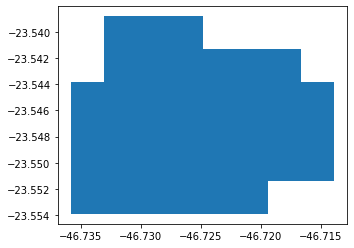

In [20]:
gdf.plot()

In [21]:
villa_lobos = gpd.read_file('../../../data/Cidade de São Paulo/Parques/villa_lobos.geojson')
villa_lobos_buffer = gpd.read_file('../../../data/Cidade de São Paulo/Parques/villa_lobos_buffer.geojson')

<AxesSubplot: >

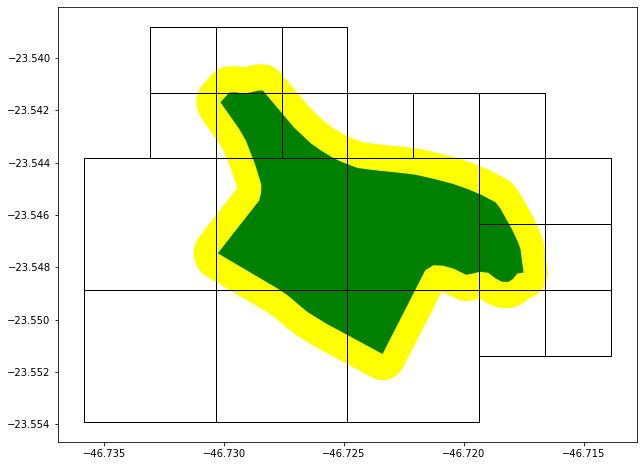

In [22]:
ax = villa_lobos_buffer.plot(color="yellow", figsize=(12,8))
villa_lobos.plot(ax=ax, color="green", figsize=(12,8))
gdf.plot(ax=ax, color="none", figsize=(12,8))

In [164]:
alb_gdf = teste.drop([9, 18, 13, 10, 7, 5, 15, 2, 19], axis=0)

In [30]:
alb_gdf2 = gdf.drop([9, 18, 13, 10, 7, 5, 15, 2, 19], axis=0)

In [24]:
alb_gdf2

,cell,geometry
0,3955,"POLYGON ((-46.73035 -23.54133, -46.73035 -23.5..."
1,18505,"POLYGON ((-46.71661 -23.54385, -46.71661 -23.5..."
3,47652,"POLYGON ((-46.72760 -23.54133, -46.72760 -23.5..."
4,56833,"POLYGON ((-46.71936 -23.54385, -46.71936 -23.5..."
6,68676,"POLYGON ((-46.72485 -23.54385, -46.72485 -23.5..."
8,86100,"POLYGON ((-46.72485 -23.54133, -46.72485 -23.5..."
11,127553,"POLYGON ((-46.71661 -23.54888, -46.71661 -23.5..."
12,148628,"POLYGON ((-46.72485 -23.54888, -46.72485 -23.5..."
14,200132,"POLYGON ((-46.71936 -23.54888, -46.71936 -23.5..."
16,211037,"POLYGON ((-46.72760 -23.53881, -46.72760 -23.5..."


<AxesSubplot: >

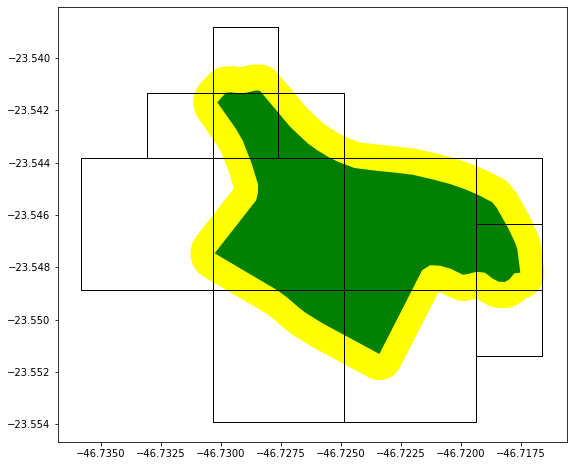

In [25]:
ax = villa_lobos_buffer.plot(color="yellow", figsize=(12,8))
villa_lobos.plot(ax=ax, color="green", figsize=(12,8))
alb_gdf2.plot(ax=ax, color="none", figsize=(12,8))

In [48]:
problema = alb_gdf2[alb_gdf2["cell"] == 47652]
problema2 = alb_gdf2[alb_gdf2["cell"] == 68676]

PF = pd.concat([problema, problema2], axis=0, ignore_index=True)

<AxesSubplot: >

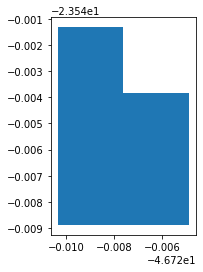

In [50]:
PF.plot()

In [32]:
alb_gdf2.to_csv("cells.csv")

In [31]:
alb_gdf2.to_file("cells.geojson")

In [33]:
alb_gdf2.to_file("cells_csv.csv")

FionaCPLError: The wrapped function returned an error code, but no error message was set.

## Merging all polygons into 1 polygon 

In [32]:
from shapely.ops import cascaded_union
from shapely.geometry import Polygon, MultiPolygon

polygons = [row.geometry for i, row in alb_gdf2.iterrows()]
merged_polygons = cascaded_union(polygons)

if type(merged_polygons) == Polygon:
    merged_polygons = MultiPolygon([merged_polygons])

merged_gdf2 = alb_gdf2.iloc[0:0]
merged_gdf2.loc[0, "geometry"] = merged_polygons

C:\Users\gabri\AppData\Local\Temp\ipykernel_18300\175896379.py:5: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  merged_polygons = cascaded_union(polygons)
C:\Users\gabri\AppData\Local\Temp\ipykernel_18300\175896379.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_gdf2.loc[0, "geometry"] = merged_polygons


In [33]:
type(merged_polygons)

shapely.geometry.multipolygon.MultiPolygon

## Making it a geodataframe

In [34]:
merged_gdf = gpd.GeoDataFrame(index=[0], crs=gdf.crs, geometry=[merged_polygons])

In [35]:
merged_gdf

,geometry
0,"MULTIPOLYGON (((-46.73035 -23.54888, -46.73584..."


## Saving

In [183]:
import os
dir = '../../../data/Cidade de São Paulo/Parques'

if not os.path.exists(dir): 
    os.makedirs(dir)
#se essa pasta não existir, crio ela

In [184]:
merged_gdf.to_file(dir + '/villa_lobos_cells.geojson')

In [ ]:
interlagos.to_file(dir + 'interlagos.geojson')

In [34]:
pd.read_csv("cells.csv")

,Unnamed: 0,cell,geometry
0,0,3955,POLYGON ((-46.7303466796875 -23.54132717050546...
1,1,18505,POLYGON ((-46.71661376953125 -23.5438451365058...
2,3,47652,POLYGON ((-46.72760009765625 -23.5413271705054...
3,4,56833,POLYGON ((-46.7193603515625 -23.54384513650584...
4,6,68676,"POLYGON ((-46.724853515625 -23.54384513650584,..."
5,8,86100,"POLYGON ((-46.724853515625 -23.54132717050546,..."
6,11,127553,POLYGON ((-46.71661376953125 -23.5488809238587...
7,12,148628,"POLYGON ((-46.724853515625 -23.54888092385875,..."
8,14,200132,POLYGON ((-46.7193603515625 -23.54888092385875...
9,16,211037,POLYGON ((-46.72760009765625 -23.5388091562943...


C:\Users\gabri\AppData\Local\Temp\ipykernel_16912\2320114490.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(alb_gdf2.geometry.centroid.x, alb_gdf2.geometry.centroid.y, alb_gdf2['cell']):
C:\Users\gabri\AppData\Local\Temp\ipykernel_16912\2320114490.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(alb_gdf2.geometry.centroid.x, alb_gdf2.geometry.centroid.y, alb_gdf2['cell']):


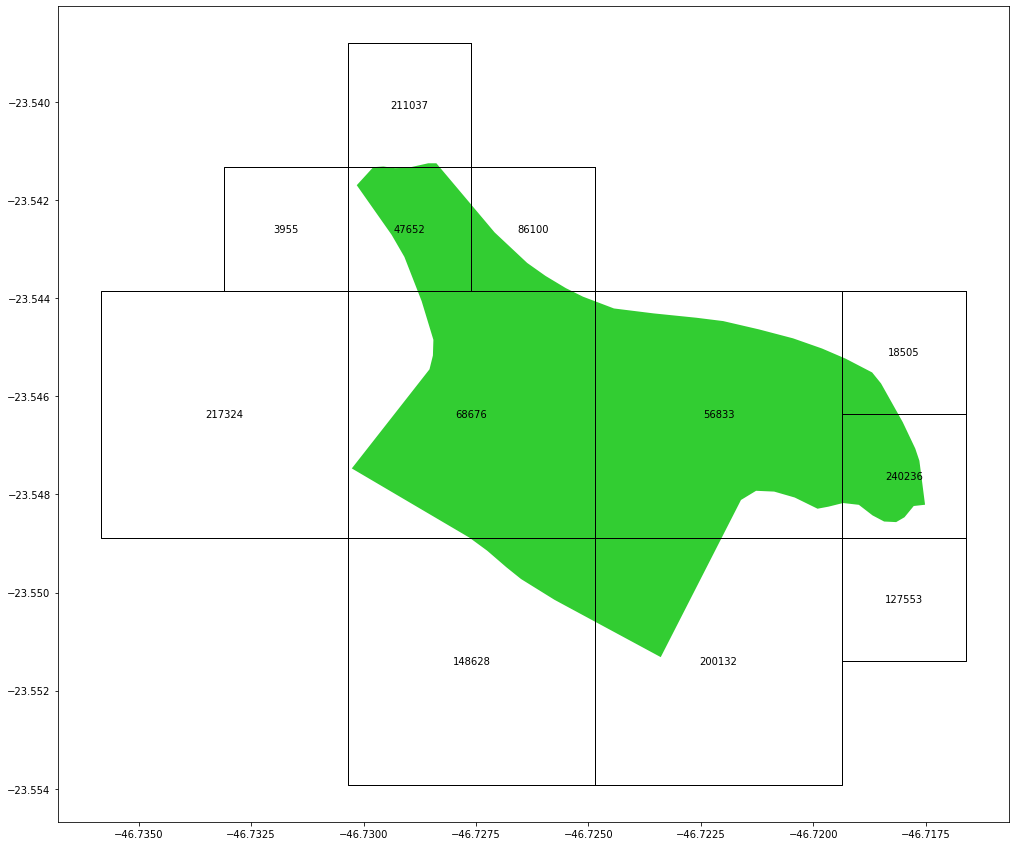

In [47]:
ax1 = villa_lobos.plot(color="limegreen", figsize=(18,15))

# Plot the GeoDataFrame
ax = alb_gdf2.plot(ax=ax1, color='none', figsize=(18,15))

# Add the text labels for the "name" column inside each polygon
for x, y, label in zip(alb_gdf2.geometry.centroid.x, alb_gdf2.geometry.centroid.y, alb_gdf2['cell']):
    ax.text(x, y, label, ha='center', va='center')
    